In [83]:
import numpy as np
import pandas as pd

import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt

функция, вычисляющая расстояние между двуя географическими точками, с помощью формулы гаверсинуса.

In [2]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

Получение данных о кораблях для обоих территорий

In [5]:
data = pd.read_csv("zonecalls_2018.csv")

In [6]:
data.head()

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft
0,431009991,Cargo ship,Japan,1512129291,41.634718,142.913972,4.0,1512129291,41.634718,142.913972,4.0
1,273395490,Cargo ship,Japan,1512139350,41.638033,143.040490,5.8,1512139350,41.638033,143.040490,5.8
2,564071000,Cargo ship,Japan,1512235415,41.617690,143.019210,10.4,1512235415,41.617690,143.019210,10.4
3,309805000,Cargo ship,Japan,1512295720,41.621667,142.931167,8.7,1512295720,41.621667,142.931167,8.7
4,309805000,Cargo ship,Japan,1512296991,41.613667,143.040667,8.7,1512296991,41.613667,143.040667,8.7


In [7]:
data["actTimeInZone"] = data.leaveTime - data.entryTime

In [35]:
data["distance"] = haversine(data.entryLatitude, data.entryLongitude, 
                             data.leaveLatitude, data.leaveLongitude)

In [36]:
data

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,actTimeInZone,distance
0,431009991,Cargo ship,Japan,1512129291,41.634718,142.913972,4.0,1512129291,41.634718,142.913972,4.0,0,0.0
1,273395490,Cargo ship,Japan,1512139350,41.638033,143.040490,5.8,1512139350,41.638033,143.040490,5.8,0,0.0
2,564071000,Cargo ship,Japan,1512235415,41.617690,143.019210,10.4,1512235415,41.617690,143.019210,10.4,0,0.0
3,309805000,Cargo ship,Japan,1512295720,41.621667,142.931167,8.7,1512295720,41.621667,142.931167,8.7,0,0.0
4,309805000,Cargo ship,Japan,1512296991,41.613667,143.040667,8.7,1512296991,41.613667,143.040667,8.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,373066000,NaN,Japan,1587218743,41.636568,143.058722,NaN,1587218743,41.636568,143.058722,NaN,0,0.0
2265,477293100,NaN,Japan,1587238720,41.636422,142.983005,NaN,1587238720,41.636422,142.983005,NaN,0,0.0
2266,316036463,NaN,Newfoundland,1587251065,46.280827,-53.316470,NaN,1587251065,46.280827,-53.316470,NaN,0,0.0
2267,419099500,NaN,Japan,1587286014,41.635317,143.035050,NaN,1587286014,41.635317,143.035050,NaN,0,0.0


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(array([ 5.,  4.,  3.,  9., 24., 51., 15.,  5.,  9.,  2.]),
 array([ 0.15662276,  1.32431641,  2.49201007,  3.65970372,  4.82739738,
         5.99509103,  7.16278469,  8.33047834,  9.498172  , 10.66586565,
        11.8335593 ]),
 <a list of 10 Patch objects>)

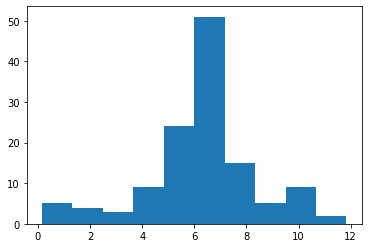

In [21]:
x = data[data.actTimeInZone != 0][data.zone=="Japan"]
plt.hist(x["distance"] * 1000/ x["actTimeInZone"])


In [7]:
correct_data_japan = data[data.zone == "Japan"][data.entryTime != data.leaveTime]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [18]:
correct_data_japan["actTimeInZone"] = correct_data_japan.leaveTime - correct_data_japan.entryTime

In [19]:
correct_data_japan

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,actTimeInZone
24,538007586,Cargo ship,Japan,1514783261,41.624073,143.047532,9.3,1514783981,41.633112,142.997902,9.3,720
36,256213000,Cargo ship,Japan,1515172995,41.639083,142.997933,12.3,1515173691,41.635100,142.910283,12.3,696
121,636018070,Cargo ship,Japan,1518687895,41.559132,142.999322,13.7,1518687903,41.559147,143.000312,13.7,8
159,354013000,Cargo ship,Japan,1519927180,41.542743,142.962462,8.2,1519927260,41.541508,142.962683,8.2,80
255,563666000,Cargo ship,Japan,1523441416,41.532000,142.945767,5.9,1523442867,41.558333,143.055717,5.9,1451
...,...,...,...,...,...,...,...,...,...,...,...,...
2231,431007841,Cargo ship,Japan,1586616671,41.589735,143.044755,4.5,1586617700,41.635340,143.083835,4.5,1029
2239,636092814,NaN,Japan,1586936645,41.616303,143.045880,NaN,1586936842,41.617310,143.062807,NaN,197
2251,354822000,NaN,Japan,1587057314,41.594948,142.993125,NaN,1587058804,41.593237,143.076600,NaN,1490
2254,351480000,NaN,Japan,1587066459,41.633950,143.021662,NaN,1587067888,41.628815,142.914895,NaN,1429


In [24]:
data[data.MMSI == 431009991]

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,actTimeInZone,distance
0,431009991,Cargo ship,Japan,1512129291,41.634718,142.913972,4.0,1512129291,41.634718,142.913972,4.0,0,0.000000
827,431009991,Cargo ship,Japan,1543071726,41.608333,142.975000,4.0,1543071726,41.608333,142.975000,4.0,0,0.000000
1792,431009991,Cargo ship,Japan,1573208733,41.637333,143.014828,4.0,1573208733,41.637333,143.014828,4.0,0,0.000000
1793,431009991,Cargo ship,Japan,1573209432,41.617077,142.996862,4.0,1573209432,41.617077,142.996862,4.0,0,0.000000
1794,431009991,Cargo ship,Japan,1573210280,41.591667,142.976667,4.0,1573212572,41.537398,142.926877,4.0,2292,7.319409
1795,431009991,Cargo ship,Japan,1573212572,41.537398,142.926877,4.0,1573212572,41.537398,142.926877,4.0,0,0.000000
1804,431009991,Cargo ship,Japan,1574005886,41.563333,143.046667,4.0,1574005886,41.563333,143.046667,4.0,0,0.000000
1829,431009991,Cargo ship,Japan,1575634537,41.635000,142.993333,4.0,1575634537,41.635000,142.993333,4.0,0,0.000000
1846,431009991,Cargo ship,Japan,1576497367,41.531667,142.926667,4.0,1576497367,41.531667,142.926667,4.0,0,0.000000
1969,431009991,Cargo ship,Japan,1579408200,41.546378,143.040562,4.0,1579408200,41.546378,143.040562,4.0,0,0.000000


In [13]:
sorted_timstmp = np.sort(data["entryTime"][data.MMSI == 431009991])
sorted_timstmp[1:] - sorted_timstmp[:-1]

array([30942435, 30137007,      699,      848,     2292,   793314,
        1628651,   862830,  2910833,      940,   190976,   874118,
            639,     1071,   682397,     1235,      211,   952339,
            808,     1003], dtype=int64)

In [23]:
t_stamp

Timestamp('2010-11-12 00:00:00')

In [35]:
readable = time.ctime(1514783261)
pd.to_datetime(readable)

Timestamp('2018-01-01 08:07:41')

In [14]:
haversine(41.637333, 143.014828, 41.617077, 142.996862)

2.7024049731289903

Сортируем данные - так чтобы смерджить строки, относящиеся к одному и тому же кораблю

Добавляем колонку о времени нахождения корабля на территории

In [8]:
sort_data = data.sort_values(by=['MMSI', 'entryTime'])
sort_data["cumSubEntryTime"] = [None, *(sort_data.entryTime.values[1:] - sort_data.entryTime.values[:-1])]
sort_data = sort_data.set_index(pd.Index([i for i in range(len(sort_data))]))
# sort_data = sort_data[(sort_data.cumSubEntryTime < 12000) & (sort_data.cumSubEntryTime > 0)]
# sort_data[sort_data.MMSI == 432760000]
sort_data

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,cumSubEntryTime
0,205421000,Tanker,Japan,1521581275,41.633533,143.024367,9.5,1521581275,41.633533,143.024367,9.5,NaN
1,209087000,Cargo ship,Japan,1544991443,41.617700,142.961522,12.3,1544991443,41.617700,142.961522,12.3,23410168.0
2,209087000,Cargo ship,Japan,1550995622,41.616667,143.065000,12.6,1550995622,41.616667,143.065000,12.6,6004179.0
3,209087000,Cargo ship,Japan,1557583394,41.616667,143.003333,13.1,1557583394,41.616667,143.003333,13.1,6587772.0
4,209087000,Cargo ship,Japan,1570571879,41.613645,142.968627,13.5,1570571879,41.613645,142.968627,13.5,12988485.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2264,636092871,Cargo ship,Japan,1562582189,41.626390,142.999737,11.1,1562582189,41.626390,142.999737,11.1,642.0
2265,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566251889,41.630843,142.925402,10.3,3669700.0
2266,636092871,Cargo ship,Japan,1566252867,41.630308,143.043965,10.3,1566252867,41.630308,143.043965,10.3,978.0
2267,636092871,Cargo ship,Japan,1569916929,41.627740,142.935783,10.7,1569916929,41.627740,142.935783,10.7,3664062.0


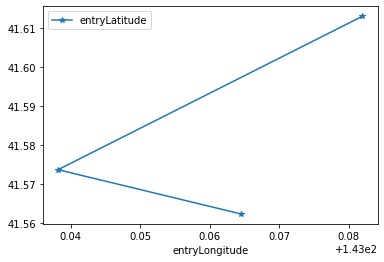

In [132]:
sort_data.loc[1615:1617].plot(kind="line", x="entryLongitude", y="entryLatitude", marker="*")

Сопоставляем данные о входе кораблей в зону и выходе из нее

Получаем время действительного пребывания кораблей в зоне, расстояния, которое судна прошли

А также получаем таргет - скорость перемещения кораблей через зону


In [9]:
cleaned_data = pd.DataFrame(columns=sort_data.columns.values)

for ind in sort_data.index:
    if (sort_data.loc[ind, "cumSubEntryTime"] > 0 and sort_data.loc[ind, "cumSubEntryTime"] < 12000):
        
        if (sort_data.loc[ind, "MMSI"] == sort_data.loc[ind, "MMSI"]):
            row = dict(sort_data.loc[ind])
            row["entryTime"] = sort_data.loc[ind-1, "entryTime"]
            row["entryLatitude"] = sort_data.loc[ind-1, "entryLatitude"]
            row["entryLongitude"] = sort_data.loc[ind-1, "entryLongitude"]
            row["entryDraft"] = sort_data.loc[ind-1, "entryDraft"]
            cleaned_data = cleaned_data.append(row, ignore_index=True)
            
cleaned_data["distance"] = haversine(cleaned_data.entryLatitude, cleaned_data.entryLongitude, 
                             cleaned_data.leaveLatitude, cleaned_data.leaveLongitude)

cleaned_data["actTimeInZone"] = cleaned_data["leaveTime"] - cleaned_data["entryTime"]
cleaned_data["cumSubEntryTime"] = -1
cleaned_data["avg_speed"] = cleaned_data["distance"] * 3600 / cleaned_data["actTimeInZone"]
cleaned_data.drop(columns=["cumSubEntryTime"], inplace=True)
cleaned_data["entryTime"] = cleaned_data["entryTime"].astype(np.int64)
cleaned_data["leaveTime"] = cleaned_data["leaveTime"].astype(np.int64)
cleaned_data

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,distance,actTimeInZone,avg_speed
0,209087000,Cargo ship,Japan,1570571879,41.613645,142.968627,13.5,1570572005,41.614692,142.982897,13.5,1.192008,126,34.0574
1,210593000,Cargo ship,Newfoundland,1538504012,46.221743,-53.293725,11.2,1538505262,46.233283,-53.396550,11.2,8.013146,1250,23.0779
2,210970000,Cargo ship,Japan,1584880119,41.562267,142.964500,12.8,1584880550,41.563933,142.932717,12.8,2.650791,431,22.1412
3,212773000,Cargo ship,Newfoundland,1522951113,46.228750,-53.295933,10.5,1522955083,46.243350,-53.272900,10.5,2.402886,3970,2.17894
4,212773000,Cargo ship,Newfoundland,1522955083,46.243350,-53.272900,10.5,1522956513,46.241683,-53.310783,10.5,2.919216,1430,7.34908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,636092871,Cargo ship,Japan,1544621021,41.629477,142.955717,10.9,1544621818,41.630172,143.038332,10.9,6.866808,797,31.0169
589,636092871,Cargo ship,Japan,1555491158,41.627670,142.938928,10.2,1555492358,41.631557,143.074525,10.2,11.278182,1200,33.8345
590,636092871,Cargo ship,Japan,1562581547,41.626400,142.923110,11.1,1562582189,41.626390,142.999737,11.1,6.369032,642,35.7142
591,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566252867,41.630308,143.043965,10.3,9.854180,978,36.2731


Распределение таргета для зоны Японии

(<matplotlib.axes._subplots.AxesSubplot at 0x2d5a3818888>,)

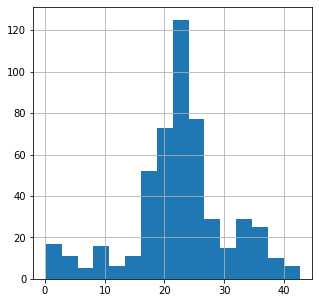

In [11]:
cleaned_data[cleaned_data.zone == "Japan"]["avg_speed"].hist(bins=16, figsize=(5,5)),

Для Ньюфаундленда

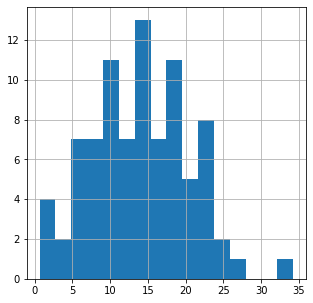

In [12]:
cleaned_data[cleaned_data.zone == "Newfoundland"]["avg_speed"].hist(bins=16, figsize=(5,5))

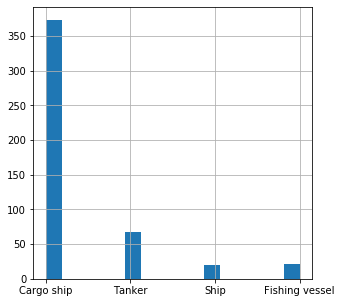

In [13]:
cleaned_data[cleaned_data.zone == "Japan"]["type"].hist(bins=16, figsize=(5,5))

Распределение времени прибытия для зоны Японии

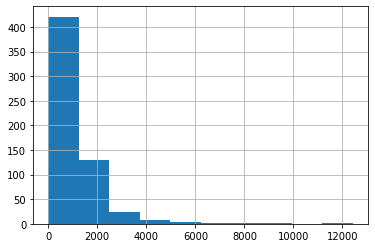

In [14]:
cleaned_data.actTimeInZone.hist()

In [15]:
cleaned_data[cleaned_data.actTimeInZone < 3600]

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,leaveDraft,distance,actTimeInZone,avg_speed
0,209087000,Cargo ship,Japan,1570571879,41.613645,142.968627,13.5,1570572005,41.614692,142.982897,13.5,1.192008,126,34.0574
1,210593000,Cargo ship,Newfoundland,1538504012,46.221743,-53.293725,11.2,1538505262,46.233283,-53.396550,11.2,8.013146,1250,23.0779
2,210970000,Cargo ship,Japan,1584880119,41.562267,142.964500,12.8,1584880550,41.563933,142.932717,12.8,2.650791,431,22.1412
4,212773000,Cargo ship,Newfoundland,1522955083,46.243350,-53.272900,10.5,1522956513,46.241683,-53.310783,10.5,2.919216,1430,7.34908
5,212773000,Cargo ship,Newfoundland,1522956513,46.241683,-53.310783,10.5,1522956603,46.242000,-53.315717,10.5,0.381079,90,15.2432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,636092871,Cargo ship,Japan,1544621021,41.629477,142.955717,10.9,1544621818,41.630172,143.038332,10.9,6.866808,797,31.0169
589,636092871,Cargo ship,Japan,1555491158,41.627670,142.938928,10.2,1555492358,41.631557,143.074525,10.2,11.278182,1200,33.8345
590,636092871,Cargo ship,Japan,1562581547,41.626400,142.923110,11.1,1562582189,41.626390,142.999737,11.1,6.369032,642,35.7142
591,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566252867,41.630308,143.043965,10.3,9.854180,978,36.2731


## Weather

In [16]:
japan_weather = pd.read_csv("weather_japan.csv", header=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
japan_weather

location                                       41.6°N 143.01°E  \
                 lat                                              41.62488   
                 lon                                             143.06389   
                 asl                                                 0.000   
            variable                                           Temperature   
                unit                                                    °C   
               level                               2 m elevation corrected   
          resolution                                                hourly   
         aggregation                                                  None   
           timestamp 41.6°N 143.01°E Temperature [2 m elevation corrected]   
0      20171201T0000                                              -0.52      
1      20171201T0100                                              -0.69      
2      20171201T0200                                              -0.69      
3      20171201T0300                                              -0.23      
4      20171201T0400                                               0.09      
..               ...                                                   ...   
21091  20200427T1900                                               6.84      
21092  20200427T2000                                               6.97      
21093  20200427T2100                                               6.96      
21094  20200427T2200                                               7.05      
21095  20200427T2300                                               7.17      

                                               \
                                                
                                                
                                                
                            Relative Humidity   
                                            %   
                                          2 m   
                                       hourly   
                                         None   
      41.6°N 143.01°E Relative Humidity [2 m]   
0                                        82.0   
1                                        86.0   
2                                        84.0   
3                                        80.0   
4                                        78.0   
..                                        ...   
21091                                    78.0   
21092                                    77.0   
21093                                    79.0   
21094                                    84.0   
21095                                    81.0   

                                                     \
                                                      
                                                      
                                                      
                            Mean Sea Level Pressure   
                                                hPa   
                                                MSL   
                                             hourly   
                                               None   
      41.6°N 143.01°E Mean Sea Level Pressure [MSL]   
0                                            1018.3   
1                                            1018.3   
2                                            1018.0   
3                                            1017.4   
4                                            1017.1   
..                                              ...   
21091                                        1016.1   
21092                                        1016.5   
21093                                        1016.6   
21094                                        1016.5   
21095                                        1016.5   

                                                                           \
                                                                            
                                 

In [17]:
japan_weather.columns = ['timestamp'] + [f"{' '.join(col[9].split()[2:])} ({col[5]})" for col in japan_weather.columns[1:]]

japan_weather['timestamp'] = pd.to_datetime(japan_weather['timestamp']).astype(np.int64)/ 10**9

japan_weather['timestamp'] = japan_weather['timestamp'].astype(np.int64)

In [18]:
japan_weather

,timestamp,Temperature [2 m elevation corrected] (°C),Relative Humidity [2 m] (%),Mean Sea Level Pressure [MSL] (hPa),Precipitation Total (mm),Snowfall Amount (cm),Cloud Cover Total (%),Cloud Cover High [high cld lay] (%),Cloud Cover Medium [mid cld lay] (%),Cloud Cover Low [low cld lay] (%),...,Wind Speed [80 m] (km/h),Wind Direction [80 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
0,1512086400,-0.52,82.0,1018.3,0.1,0.07,100.0,0.0,0.0,100.0,...,31.035257,273.99090,39.961617,259.09497,57.726986,252.58203,143.0,1400.0,-3.20,-14.54
1,1512090000,-0.69,86.0,1018.3,0.1,0.07,100.0,0.0,0.0,100.0,...,30.574575,282.23610,43.178990,262.81573,58.740704,258.69006,143.0,1398.0,-3.42,-14.89
2,1512093600,-0.69,84.0,1018.0,0.0,0.00,100.0,0.0,0.0,100.0,...,32.654995,284.03625,45.070503,273.20520,59.404366,269.30554,141.0,1395.0,-3.43,-15.31
3,1512097200,-0.23,80.0,1017.4,0.0,0.00,100.0,0.0,0.0,100.0,...,36.783470,273.36646,45.451336,266.36707,59.568850,262.35960,136.0,1394.0,-2.90,-14.67
4,1512100800,0.09,78.0,1017.1,0.1,0.07,100.0,0.0,0.0,100.0,...,39.601635,270.52084,45.958904,264.15546,61.820500,256.53020,134.0,1393.0,-2.60,-14.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21091,1588014000,6.84,78.0,1016.1,0.0,0.00,10.0,0.0,0.0,10.0,...,31.608328,255.48894,36.402750,261.46924,40.323215,262.30396,130.0,1432.0,5.39,-4.38
21092,1588017600,6.97,77.0,1016.5,0.0,0.00,10.0,0.0,0.0,10.0,...,30.351225,247.69379,39.047970,257.75766,41.312252,257.41705,133.0,1436.0,5.53,-4.41
21093,1588021200,6.96,79.0,1016.6,0.0,0.00,10.0,0.0,0.0,10.0,...,29.827904,240.34090,39.120920,255.06857,41.792576,252.96985,134.0,1438.0,5.51,-4.37
21094,1588024800,7.05,84.0,1016.5,0.0,0.00,10.0,0.0,0.0,10.0,...,30.259280,235.17550,40.953064,255.23080,42.261300,249.55820,134.0,1438.0,5.62,-4.36


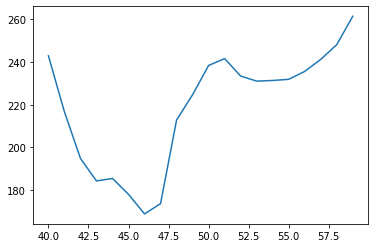

In [28]:
plt.plot(directions_japan_weather["Wind Direction [10 m] (°)"][40:60])

### Мердж данных о кораблей и погодных признаков, для зоны Японии

обработка признака направления, взятие среднего по каждому из признаков

In [19]:
japan_ships = cleaned_data[cleaned_data.zone == "Japan"]

In [20]:
japan_ships_avg_weather = pd.DataFrame(columns=list(japan_ships.columns.values) + \
                                       list(japan_weather.columns.values[1:]))

direct_columns = ["Wind Direction [10 m] (°)", "Wind Direction [850 mb] (°)",
                           "Wind Direction [900 mb] (°)","Wind Direction [80 m] (°)"]

for ind in japan_ships.index:
    entryHour = (japan_ships.loc[ind, "entryTime"] // 3600) * 3600
    leaveHour = (japan_ships.loc[ind, "leaveTime"] // 3600) * 3600

    boundHourWeather = japan_weather[(japan_weather.timestamp >= entryHour) & (japan_weather.timestamp <= leaveHour + 3600)]
    if(len(boundHourWeather) == 0):
        print(ind, japan_ships.loc[ind]) #excecution
    
    #обработка признака направлени 
    for w_ind in boundHourWeather.index[1:]:
        subst = boundHourWeather.loc[w_ind - 1] - boundHourWeather.loc[w_ind]
        for col in direct_columns:
            if abs(subst[col]) > 180:
                boundHourWeather.loc[w_ind, col] = boundHourWeather.loc[w_ind, col] + 360 if subst[col] > 0 else \
                                                   boundHourWeather.loc[w_ind, col] - 360
            
    
    begin_weather = boundHourWeather.iloc[0] + (japan_ships.loc[ind, "entryTime"] - entryHour) / 3600. * \
                                (boundHourWeather.iloc[1] - boundHourWeather.iloc[0])

    end_weather = boundHourWeather.iloc[-2] + (japan_ships.loc[ind, "leaveTime"] - leaveHour) / 3600. * \
                                (boundHourWeather.iloc[-1] - boundHourWeather.iloc[-2])

    boundHourWeather = pd.concat([pd.DataFrame([begin_weather]), 
                                 boundHourWeather.iloc[1:-1], 
                                 pd.DataFrame([end_weather])], ignore_index=True)

    S = 0 
    for w_ind in boundHourWeather.index[1:]:
        S += (boundHourWeather.loc[w_ind - 1] + boundHourWeather.loc[w_ind]) / 2 * \
                                (boundHourWeather.loc[w_ind, "timestamp"] - boundHourWeather.loc[w_ind-1, "timestamp"])

    avg_weather = S.drop(labels=["timestamp"]) / (cleaned_data.loc[ind, "leaveTime"] - cleaned_data.loc[ind, "entryTime"])
    row = pd.concat([cleaned_data.loc[ind], avg_weather])
    
    japan_ships_avg_weather = japan_ships_avg_weather.append(row, 
                                       ignore_index=True)
    
    
japan_ships_avg_weather.fillna("UNK", inplace=True)
        
        
japan_ships_avg_weather

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,...,Wind Speed [80 m] (km/h),Wind Direction [80 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
0,209087000,Cargo ship,Japan,1570571879,41.613645,142.968627,13.5,1570572005,41.614692,142.982897,...,78.897941,227.621568,95.849269,233.392173,110.430856,245.753129,37.064527,1373.032332,13.623401,1.818224
1,210970000,Cargo ship,Japan,1584880119,41.562267,142.964500,12.8,1584880550,41.563933,142.932717,...,29.308240,286.206475,24.170839,281.021279,23.512268,273.302762,50.074722,1349.537361,5.382782,-5.232242
2,218042000,Cargo ship,Japan,1560913953,41.615987,142.930195,12.4,1560914941,41.616225,143.045243,...,18.440369,143.636874,19.356390,179.971659,23.259651,203.137338,86.307222,1452.653611,11.087564,9.831628
3,219228000,Cargo ship,Japan,1568478505,41.616233,143.045280,14.6,1568478601,41.616855,143.055958,...,44.319585,187.696134,32.796372,216.324788,28.894293,223.400913,107.513056,1492.513056,19.643303,11.901214
4,219228000,UNK,Japan,1586616672,41.622782,142.964218,UNK,1586617698,41.609600,143.081577,...,34.164793,35.831280,30.137934,278.996651,47.464174,272.527170,141.000000,1428.004167,0.461028,-6.594602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,636092871,Cargo ship,Japan,1544621021,41.629477,142.955717,10.9,1544621818,41.630172,143.038332,...,50.561416,353.245362,38.200856,307.814889,38.874115,302.665684,88.021667,1365.000000,-0.480758,-7.677221
503,636092871,Cargo ship,Japan,1555491158,41.627670,142.938928,10.2,1555492358,41.631557,143.074525,...,24.064429,227.407985,39.497565,262.096073,36.407888,252.239992,129.131667,1485.176890,13.784396,8.846328
504,636092871,Cargo ship,Japan,1562581547,41.626400,142.923110,11.1,1562582189,41.626390,142.999737,...,19.657475,74.006698,18.885150,55.147775,26.375727,47.547425,114.000000,1474.481111,9.421889,12.570000
505,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566252867,41.630308,143.043965,...,27.105607,104.530337,14.834049,134.360091,15.064604,200.859594,129.005249,1505.790000,17.236638,13.912308


In [23]:
ind = 426

entryHour = (japan_ships.loc[ind, "entryTime"] // 3600) * 3600
leaveHour = (japan_ships.loc[ind, "leaveTime"] // 3600) * 3600

boundHourWeather = japan_weather[(japan_weather.timestamp >= entryHour) & (japan_weather.timestamp <= leaveHour + 3600)]
for w_ind in boundHourWeather.index[1:]:
    subst = boundHourWeather.loc[w_ind - 1] - boundHourWeather.loc[w_ind]
    for col in direct_columns:
        if abs(subst[col]) > 180:
            boundHourWeather.loc[w_ind, col] = boundHourWeather.loc[w_ind, col] + 360 if subst[col] > 0 else \
                                               boundHourWeather.loc[w_ind, col] - 360
begin_weather = boundHourWeather.iloc[0] + (japan_ships.loc[ind, "entryTime"] - entryHour) / 3600. * \
                                (boundHourWeather.iloc[1] - boundHourWeather.iloc[0])

end_weather = boundHourWeather.iloc[-2] + (japan_ships.loc[ind, "leaveTime"] - leaveHour) / 3600. * \
                                (boundHourWeather.iloc[-1] - boundHourWeather.iloc[-2])

pd.concat([pd.DataFrame([begin_weather]), 
                                 boundHourWeather.iloc[1:-1], 
                                 pd.DataFrame([end_weather])], ignore_index=True)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,timestamp,Temperature [2 m elevation corrected] (°C),Relative Humidity [2 m] (%),Mean Sea Level Pressure [MSL] (hPa),Precipitation Total (mm),Snowfall Amount (cm),Cloud Cover Total (%),Cloud Cover High [high cld lay] (%),Cloud Cover Medium [mid cld lay] (%),Cloud Cover Low [low cld lay] (%),...,Wind Speed [80 m] (km/h),Wind Direction [80 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
0,1.584991e+09,1.456792,87.571111,1009.625028,0.0,0.0,86.068333,0.0,0.0,86.068333,...,46.249084,0.570753,41.209633,-0.841777,36.118629,337.234126,76.893056,1352.714444,-0.174631,-9.371456
1,1.584991e+09,1.467667,86.991111,1009.675778,0.0,0.0,80.413333,0.0,0.0,80.413333,...,44.997772,0.293237,40.517793,-2.549934,35.868081,337.858682,77.255556,1353.004444,-0.152156,-9.420756


In [64]:
np.tan((-1.5 + 90)* np.pi / 180.)

38.18845929702563

In [70]:
entryHour = (cleaned_data.loc[0, "entryTime"] // 3600) * 3600
leaveHour = (cleaned_data.loc[0, "leaveTime"] // 3600) * 3600

boundHourWeather = japan_weather[(japan_weather.timestamp >= entryHour) & (japan_weather.timestamp <= leaveHour + 3600)].drop(columns=['timestamp'])
boundHourWeather 

,Temperature [2 m elevation corrected] (°C),Mean Sea Level Pressure [MSL] (hPa),Precipitation Total (mm),Snowfall Amount (cm),Cloud Cover Total (%),Cloud Cover High [high cld lay] (%),Cloud Cover Medium [mid cld lay] (%),Cloud Cover Low [low cld lay] (%),Wind Gust (km/h),Wind Speed [10 m] (km/h),Wind Direction [10 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
15501,14.79,1004.9,0.0,0.0,100.0,0.0,60.0,100.0,75.600000,47.071453,229.82077,88.059555,233.64542,104.02505,244.58780,41.0,1375.0,13.22,1.10
15502,15.12,1004.4,0.2,0.0,100.0,0.0,0.0,100.0,78.840000,50.158245,227.58302,95.976970,233.38800,110.53583,245.77226,37.0,1373.0,13.63,1.83
15503,15.66,1004.3,0.1,0.0,100.0,0.0,0.0,100.0,82.799995,53.346558,230.26770,98.724710,234.04944,114.20173,245.21225,36.0,1375.0,14.29,2.03


In [49]:
(cleaned_data.loc[0, "entryTime"] // 3600) * 3600

1517779851.0

#### избавление от пропусков в данных

In [24]:
japan_ships_avg_weather.type.unique()

array(['Cargo ship', 'UNK', 'Tanker', 'Ship', 'Fishing vessel'],
      dtype=object)

Заполнение недостающих типов кораблей

In [25]:
japan_ships_avg_weather.MMSI[japan_ships_avg_weather.type == "UNK"]

4      219228000
24     235335000
43     257350000
82     273421240
83     273421240
119    351480000
120    351480000
139    354822000
140    354822000
148    355784000
149    355784000
186    373066000
187    373066000
195    373540000
198    374219000
210    374493000
211    374493000
232    419099500
235    431000572
293    431010869
294    431010869
363    477700500
364    477700500
445    538007675
501    636092814
Name: MMSI, dtype: int64

In [189]:
373540000 # - delete

374219000 #- tanker

(355784000, 373540000)

In [43]:
japan_ships_avg_weather

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,...,Wind Speed [80 m] (km/h),Wind Direction [80 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
0,209087000,Cargo ship,Japan,1570571879,41.613645,142.968627,13.5,1570572005,41.614692,142.982897,...,78.897941,227.621568,95.849269,233.392173,110.430856,245.753129,37.064527,1373.032332,13.623401,1.818224
1,210970000,Cargo ship,Japan,1584880119,41.562267,142.964500,12.8,1584880550,41.563933,142.932717,...,29.308240,286.206475,24.170839,281.021279,23.512268,273.302762,50.074722,1349.537361,5.382782,-5.232242
2,218042000,Cargo ship,Japan,1560913953,41.615987,142.930195,12.4,1560914941,41.616225,143.045243,...,18.440369,143.636874,19.356390,179.971659,23.259651,203.137338,86.307222,1452.653611,11.087564,9.831628
3,219228000,Cargo ship,Japan,1568478505,41.616233,143.045280,14.6,1568478601,41.616855,143.055958,...,44.319585,187.696134,32.796372,216.324788,28.894293,223.400913,107.513056,1492.513056,19.643303,11.901214
4,219228000,Cargo ship,Japan,1586616672,41.622782,142.964218,UNK,1586617698,41.609600,143.081577,...,34.164793,35.831280,30.137934,278.996651,47.464174,272.527170,141.000000,1428.004167,0.461028,-6.594602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,636092871,Cargo ship,Japan,1544621021,41.629477,142.955717,10.9,1544621818,41.630172,143.038332,...,50.561416,353.245362,38.200856,307.814889,38.874115,302.665684,88.021667,1365.000000,-0.480758,-7.677221
503,636092871,Cargo ship,Japan,1555491158,41.627670,142.938928,10.2,1555492358,41.631557,143.074525,...,24.064429,227.407985,39.497565,262.096073,36.407888,252.239992,129.131667,1485.176890,13.784396,8.846328
504,636092871,Cargo ship,Japan,1562581547,41.626400,142.923110,11.1,1562582189,41.626390,142.999737,...,19.657475,74.006698,18.885150,55.147775,26.375727,47.547425,114.000000,1474.481111,9.421889,12.570000
505,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566252867,41.630308,143.043965,...,27.105607,104.530337,14.834049,134.360091,15.064604,200.859594,129.005249,1505.790000,17.236638,13.912308


In [26]:
japan_ships_avg_weather.type[japan_ships_avg_weather.type == "UNK"] = "Cargo ship"
japan_ships_avg_weather.type[japan_ships_avg_weather.MMSI == 374219000] = 'Tanker'
japan_ships_avg_weather.drop([195], inplace=True) #373540000

japan_ships_avg_weather.type.unique()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['Cargo ship', 'Tanker', 'Ship', 'Fishing vessel'], dtype=object)

Сохранение обработанных данных

In [54]:
japan_ships_avg_weather.to_csv("JapanShipWeather.csv")

Получение распределения скорости по каждому типу

In [27]:
plt.figure()

for typ in japan_ships_avg_weather.type.unique():
    print(typ, japan_ships_avg_weather.avg_speed[japan_ships_avg_weather.type == typ].describe())
    
    
    
japan_ships_avg_weather.groupby('type')['avg_speed'].describe()

Cargo ship count    396.000000
mean      23.792858
std        7.369153
min        0.158167
25%       20.234661
50%       23.047481
75%       26.808993
max       42.600813
Name: avg_speed, dtype: float64
Tanker count    68.000000
mean     18.854503
std       9.557713
min       2.383093
25%      15.312492
50%      21.717462
75%      25.058394
max      36.836756
Name: avg_speed, dtype: float64
Ship count    20.000000
mean     15.395678
std       9.631120
min       0.607288
25%       6.480233
50%      19.553534
75%      21.753872
max      28.178559
Name: avg_speed, dtype: float64
Fishing vessel count    22.000000
mean     16.969607
std       6.054861
min       3.978992
25%      12.225645
50%      16.916401
75%      20.527064
max      28.604437
Name: avg_speed, dtype: float64


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Cargo ship,396.0,23.792858,7.369153,0.158167,20.234661,23.047481,26.808993,42.600813
Fishing vessel,22.0,16.969607,6.054861,3.978992,12.225645,16.916401,20.527064,28.604437
Ship,20.0,15.395678,9.631120,0.607288,6.480233,19.553534,21.753872,28.178559
Tanker,68.0,18.854503,9.557713,2.383093,15.312492,21.717462,25.058394,36.836756


<Figure size 432x288 with 0 Axes>

In [649]:
japan_ships_avg_weather['type'].unique()

array(['Cargo ship', 'Tanker', 'Ship', 'Fishing vessel'], dtype=object)

Получение признака отклонения от среднего по каждому типу

In [29]:
japan_ships_avg_weather['dev_mean'] = pd.Series(np.ones(len(japan_ships_avg_weather))*(-1), 
                                                index=japan_ships_avg_weather.index)

for type_str in japan_ships_avg_weather.type.unique():
    japan_ships_avg_weather['dev_mean'][japan_ships_avg_weather.type == type_str] = \
        (japan_ships_avg_weather['avg_speed'][japan_ships_avg_weather.type == type_str] -type_means[type_str]).abs()

japan_ships_avg_weather.drop(columns=['dev_mean'], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


получение отклонения от медианы

In [30]:

type_medians = japan_ships_avg_weather.groupby('type').median()['avg_speed']

japan_ships_avg_weather['dev_median'] = pd.Series(np.ones(len(japan_ships_avg_weather))*(-1), 
                                                index=japan_ships_avg_weather.index)

for type_str in japan_ships_avg_weather.type.unique():
    japan_ships_avg_weather['dev_median'][japan_ships_avg_weather.type == type_str] = \
        (japan_ships_avg_weather['avg_speed'][japan_ships_avg_weather.type == type_str] - type_medians[type_str]).abs()

japan_ships_avg_weather.drop(columns=['dev_median'], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Обработка данных о погоде для зоны Ньюфаундленда

In [31]:
newfoundland_ships = cleaned_data[cleaned_data.zone == "Newfoundland"]

newfoundland_ships.type.unique()

array(['Cargo ship', 'Tanker', 'Fishing vessel', nan, 'Ship'],
      dtype=object)

In [32]:
for typ in newfoundland_ships.type.unique():
    print(typ, newfoundland_ships.avg_speed[newfoundland_ships.type == typ].describe())

Cargo ship count     16.000000
unique    16.000000
top       26.920816
freq       1.000000
Name: avg_speed, dtype: float64
Tanker count     63.0000
unique    63.0000
top       14.5064
freq       1.0000
Name: avg_speed, dtype: float64
Fishing vessel count      3.000000
unique     3.000000
top       10.182288
freq       1.000000
Name: avg_speed, dtype: float64
nan count       0
unique      0
top       NaN
freq      NaN
Name: avg_speed, dtype: object
Ship count     3.000000
unique    3.000000
top       1.755956
freq      1.000000
Name: avg_speed, dtype: float64


In [34]:
newfoundland_ships = cleaned_data[cleaned_data.zone == "Newfoundland"]

In [35]:
newfoundland_weather = pd.read_csv("weather_newfoundland.csv", header=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
newfoundland_weather.head()

location                                       41.6°N 143.01°E  \
             lat                                              41.62488   
             lon                                             143.06389   
             asl                                                 0.000   
        variable                                           Temperature   
            unit                                                    °C   
           level                               2 m elevation corrected   
      resolution                                                hourly   
     aggregation                                                  None   
       timestamp 41.6°N 143.01°E Temperature [2 m elevation corrected]   
0  20171201T0000                                              -0.52      
1  20171201T0100                                              -0.69      
2  20171201T0200                                              -0.69      
3  20171201T0300                                              -0.23      
4  20171201T0400                                               0.09      

                                           \
                                            
                                            
                                            
                        Relative Humidity   
                                        %   
                                      2 m   
                                   hourly   
                                     None   
  41.6°N 143.01°E Relative Humidity [2 m]   
0                                    82.0   
1                                    86.0   
2                                    84.0   
3                                    80.0   
4                                    78.0   

                                                 \
                                                  
                                                  
                                                  
                        Mean Sea Level Pressure   
                                            hPa   
                                            MSL   
                                         hourly   
                                           None   
  41.6°N 143.01°E Mean Sea Level Pressure [MSL]   
0                                        1018.3   
1                                        1018.3   
2                                        1018.0   
3                                        1017.4   
4                                        1017.1   

                                                                       \
                                                                        
                                                                        
                                                                        
                  Precipitation Total                 Snowfall Amount   
                                   mm                              cm   
                                  sfc                             sfc   
                               hourly                          hourly   
                                 None                            None   
  41.6°N 143.01°E Precipitation Total 41.6°N 143.01°E Snowfall Amount   
0                                 0.1                            0.07   
1                                 0.1                            0.07   
2                                 0.0                            0.00   
3                                 0.0                            0.00   
4                                 0.1                            0.07   

                                     \
                                      
                                      
                                      
                  Cloud Cover Total   
                                  %   
                                sfc   
                             hourly   
                               None   
  41.6°N

In [36]:
newfoundland_weather.columns = ['timestamp'] + [f"{' '.join(col[9].split()[2:])} ({col[5]})" for col in newfoundland_weather.columns[1:]]

newfoundland_weather['timestamp'] = pd.to_datetime(newfoundland_weather['timestamp']).astype(np.int64)/ 10**9

newfoundland_weather['timestamp'] = newfoundland_weather['timestamp'].astype(np.int64)

In [41]:
direct_columns

['Wind Direction [10 m] (°)',
 'Wind Direction [850 mb] (°)',
 'Wind Direction [900 mb] (°)',
 'Wind Direction [80 m] (°)']

Мердж данных, взятие среднего для погодных признаков

In [38]:
newfoundland_ships_avg_weather = pd.DataFrame(columns=list(newfoundland_ships.columns.values) + \
                                       list(newfoundland_weather.columns.values[1:]))

for ind in newfoundland_ships.index:
    entryHour = (newfoundland_ships.loc[ind, "entryTime"] // 3600) * 3600
    leaveHour = (newfoundland_ships.loc[ind, "leaveTime"] // 3600) * 3600

    boundHourWeather = newfoundland_weather[(newfoundland_weather.timestamp >= entryHour) & \
                                            (newfoundland_weather.timestamp <= leaveHour + 3600)]
    if(len(boundHourWeather) == 0):
        print(ind, newfoundland_ships.loc[ind])
    
    #direction's angles adjusted 
    for w_ind in boundHourWeather.index[1:]:
        subst = boundHourWeather.loc[w_ind - 1] - boundHourWeather.loc[w_ind]
        for col in direct_columns:
            if abs(subst[col]) > 180:
                boundHourWeather.loc[w_ind, col] = boundHourWeather.loc[w_ind, col] + 360 if subst[col] > 0 else \
                                                   boundHourWeather.loc[w_ind, col] - 360
    
    begin_weather = boundHourWeather.iloc[0] + (newfoundland_ships.loc[ind, "entryTime"] - entryHour) / 3600. * \
                                (boundHourWeather.iloc[1] - boundHourWeather.iloc[0])

    end_weather = boundHourWeather.iloc[-2] + (newfoundland_ships.loc[ind, "leaveTime"] - leaveHour) / 3600. * \
                                (boundHourWeather.iloc[-1] - boundHourWeather.iloc[-2])

    boundHourWeather = pd.concat([pd.DataFrame([begin_weather]), 
                                 boundHourWeather.iloc[1:-1], 
                                 pd.DataFrame([end_weather])], ignore_index=True)

    S = 0 
    for w_ind in boundHourWeather.index[1:]:
        S += (boundHourWeather.loc[w_ind - 1] + boundHourWeather.loc[w_ind]) / 2 * \
                                (boundHourWeather.loc[w_ind, "timestamp"] - boundHourWeather.loc[w_ind-1, "timestamp"])

    avg_weather = S.drop(labels=["timestamp"]) / (cleaned_data.loc[ind, "leaveTime"] - cleaned_data.loc[ind, "entryTime"])
    row = pd.concat([cleaned_data.loc[ind], avg_weather])
    
    newfoundland_ships_avg_weather = newfoundland_ships_avg_weather.append(row, 
                                       ignore_index=True)
    
newfoundland_ships_avg_weather.fillna("UNK", inplace=True)     
        
newfoundland_ships_avg_weather

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,...,Wind Speed [80 m] (km/h),Wind Direction [80 m] (°),Wind Speed [900 mb] (km/h),Wind Direction [900 mb] (°),Wind Speed [850 mb] (km/h),Wind Direction [850 mb] (°),Geopotential Height [1000 mb] (Gpm),Geopotential Height [850 mb] (Gpm),Temperature [1000 mb] (°C),Temperature [850 mb] (°C)
0,210593000,Cargo ship,Newfoundland,1538504012,46.221743,-53.293725,11.2,1538505262,46.233283,-53.396550,...,30.826872,240.078689,34.440083,242.771336,40.877841,242.413589,146.798333,1498.000000,15.046258,5.184075
1,212773000,Cargo ship,Newfoundland,1522951113,46.228750,-53.295933,10.5,1522955083,46.243350,-53.272900,...,22.031164,236.459712,27.403108,236.358858,38.700415,240.723049,149.888574,1434.899782,2.276705,-7.492507
2,212773000,Cargo ship,Newfoundland,1522955083,46.243350,-53.272900,10.5,1522956513,46.241683,-53.310783,...,20.114103,246.837488,34.353162,236.574095,46.368445,229.452225,146.613889,1432.722778,1.862378,-6.787428
3,212773000,Cargo ship,Newfoundland,1522956513,46.241683,-53.310783,10.5,1522956603,46.242000,-53.315717,...,18.755666,250.070191,37.287198,234.345821,49.050833,227.384679,145.558333,1432.511667,1.803267,-6.709317
4,212934000,Cargo ship,Newfoundland,1544367084,46.200000,-53.383333,9.6,1544368634,46.196018,-53.272202,...,46.225716,289.735650,51.504523,282.321852,58.911316,273.185575,182.143889,1430.263549,-4.776229,-16.453828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,356691000,Ship,Newfoundland,1545032584,46.280118,-53.282127,23,1545035717,46.286102,-53.264225,...,17.210299,316.740647,20.315291,313.576885,23.294200,291.798609,40.785688,1335.587011,4.896418,-6.503407
82,477634900,Cargo ship,Newfoundland,1543133059,46.244633,-53.272967,10,1543134125,46.248783,-53.364183,...,41.859062,181.305296,39.326506,201.999206,37.771592,208.026418,165.900000,1482.340000,8.354200,-1.526800
83,477700600,Cargo ship,Newfoundland,1520343347,46.291917,-53.423300,11.5,1520349558,46.276533,-53.273250,...,45.736109,295.667498,49.140583,293.538879,52.968187,290.626218,246.836111,1481.883321,-7.764284,-19.788978
84,477700600,Cargo ship,Newfoundland,1520349247,46.277850,-53.280383,11.5,1520349558,46.276533,-53.273250,...,44.135839,294.734013,47.802255,292.730804,53.331113,290.847443,250.113889,1485.113889,-7.804431,-19.768229


In [55]:
newfoundland_ships_avg_weather.to_csv("NefoundlandShipWeather.csv")

#### Объединение данных для Японии и Ньюфаундленда

**получение признаков косинуса и тангенса угла между направлением движения и направлением ветра**

In [63]:
ships_avg_weather = pd.concat([newfoundland_ships_avg_weather,
                              japan_ships_avg_weather], ignore_index=True)

for col in direct_columns:
    ships_avg_weather[col] = (-1) * ships_avg_weather[col] + 270.
    ships_avg_weather["x coord " + col] = np.cos(ships_avg_weather[col]*np.pi / 180.)
    ships_avg_weather["y coord " + col] = np.sin(ships_avg_weather[col]*np.pi / 180.)
    ships_avg_weather["tan " + col] = np.tan(ships_avg_weather[col]*np.pi / 180.)
    
# вектор направления
ships_avg_weather['subLatitude'] = ships_avg_weather['leaveLatitude'] - ships_avg_weather['entryLatitude']  #y
ships_avg_weather['subLongitude'] = ships_avg_weather['leaveLongitude'] - ships_avg_weather['entryLongitude'] #x

#косинус угла между ветром и движением судна
for col in direct_columns:
    ships_avg_weather["cos between move and: " + col] = \
    (ships_avg_weather['subLongitude']*ships_avg_weather["x coord " + col] + \
    ships_avg_weather['subLatitude']*ships_avg_weather["y coord " + col]) / \
    np.sqrt(ships_avg_weather['subLongitude']**2 + ships_avg_weather['subLatitude']**2)
    
    ships_avg_weather["tan between move and: " + col] = np.tan(np.arccos(ships_avg_weather["cos between move and: " + col]))

Сохранение данных

In [64]:
ships_avg_weather.to_csv("ShipsWeather.csv")

In [57]:
ships_avg_weather

,MMSI,type,zone,entryTime,entryLatitude,entryLongitude,entryDraft,leaveTime,leaveLatitude,leaveLongitude,...,subLatitude,subLongitude,cos between move and: Wind Direction [10 m] (°),tan between move and: Wind Direction [10 m] (°),cos between move and: Wind Direction [850 mb] (°),tan between move and: Wind Direction [850 mb] (°),cos between move and: Wind Direction [900 mb] (°),tan between move and: Wind Direction [900 mb] (°),cos between move and: Wind Direction [80 m] (°),tan between move and: Wind Direction [80 m] (°)
0,210593000,Cargo ship,Newfoundland,1538504012,46.221743,-53.293725,11.2,1538505262,46.233283,-53.396550,...,0.011540,-0.102825,0.288021,3.324847,0.838560,0.649696,0.594697,1.351866,-0.186838,-5.257968
1,212773000,Cargo ship,Newfoundland,1522951113,46.228750,-53.295933,10.5,1522955083,46.243350,-53.272900,...,0.014600,0.023033,0.365673,2.545290,-0.905745,-0.467928,-0.089346,-11.147718,0.011389,87.798295
2,212773000,Cargo ship,Newfoundland,1522955083,46.243350,-53.272900,10.5,1522956513,46.241683,-53.310783,...,-0.001667,-0.037883,0.278175,3.452974,0.943782,0.350259,0.384999,2.397194,0.429021,2.105477
3,212773000,Cargo ship,Newfoundland,1522956513,46.241683,-53.310783,10.5,1522956603,46.242000,-53.315717,...,0.000317,-0.004934,0.158188,6.241980,-0.264784,-3.641865,0.398588,2.300946,-0.413580,-2.201428
4,212934000,Cargo ship,Newfoundland,1544367084,46.200000,-53.383333,9.6,1544368634,46.196018,-53.272202,...,-0.003982,0.111131,0.342020,2.747478,-0.999967,-0.008166,0.960963,0.287917,0.659774,1.138970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,636092871,Cargo ship,Japan,1544621021,41.629477,142.955717,10.9,1544621818,41.630172,143.038332,...,0.000695,0.082615,0.416900,2.180263,0.307559,3.093809,0.992298,0.124832,-0.001569,-637.235817
588,636092871,Cargo ship,Japan,1555491158,41.627670,142.938928,10.2,1555492358,41.631557,143.074525,...,0.003887,0.135597,0.855661,0.604840,0.437297,2.056537,-0.021286,-46.968386,0.151273,6.534484
589,636092871,Cargo ship,Japan,1562581547,41.626400,142.923110,11.1,1562582189,41.626390,142.999737,...,-0.000010,0.076627,-0.931997,-0.388912,-0.825125,-0.684685,0.339835,2.767473,0.348629,2.688417
590,636092871,Cargo ship,Japan,1566251889,41.630843,142.925402,10.3,1566252867,41.630308,143.043965,...,-0.000535,0.118563,0.196111,5.000126,0.999554,0.029889,-0.849406,-0.621304,-0.514617,-1.666133


In [65]:
list(japan_weather.columns.values[1:])

['Temperature [2 m elevation corrected] (°C)',
 'Relative Humidity [2 m] (%)',
 'Mean Sea Level Pressure [MSL] (hPa)',
 'Precipitation Total (mm)',
 'Snowfall Amount (cm)',
 'Cloud Cover Total (%)',
 'Cloud Cover High [high cld lay] (%)',
 'Cloud Cover Medium [mid cld lay] (%)',
 'Cloud Cover Low [low cld lay] (%)',
 'Wind Speed [10 m] (km/h)',
 'Wind Direction [10 m] (°)',
 'Wind Speed [80 m] (km/h)',
 'Wind Direction [80 m] (°)',
 'Wind Speed [900 mb] (km/h)',
 'Wind Direction [900 mb] (°)',
 'Wind Speed [850 mb] (km/h)',
 'Wind Direction [850 mb] (°)',
 'Geopotential Height [1000 mb] (Gpm)',
 'Geopotential Height [850 mb] (Gpm)',
 'Temperature [1000 mb] (°C)',
 'Temperature [850 mb] (°C)']

### Анализ  признаков моделей

In [383]:
import seaborn as sns

Попарные графики между некоторыми погодными признаками

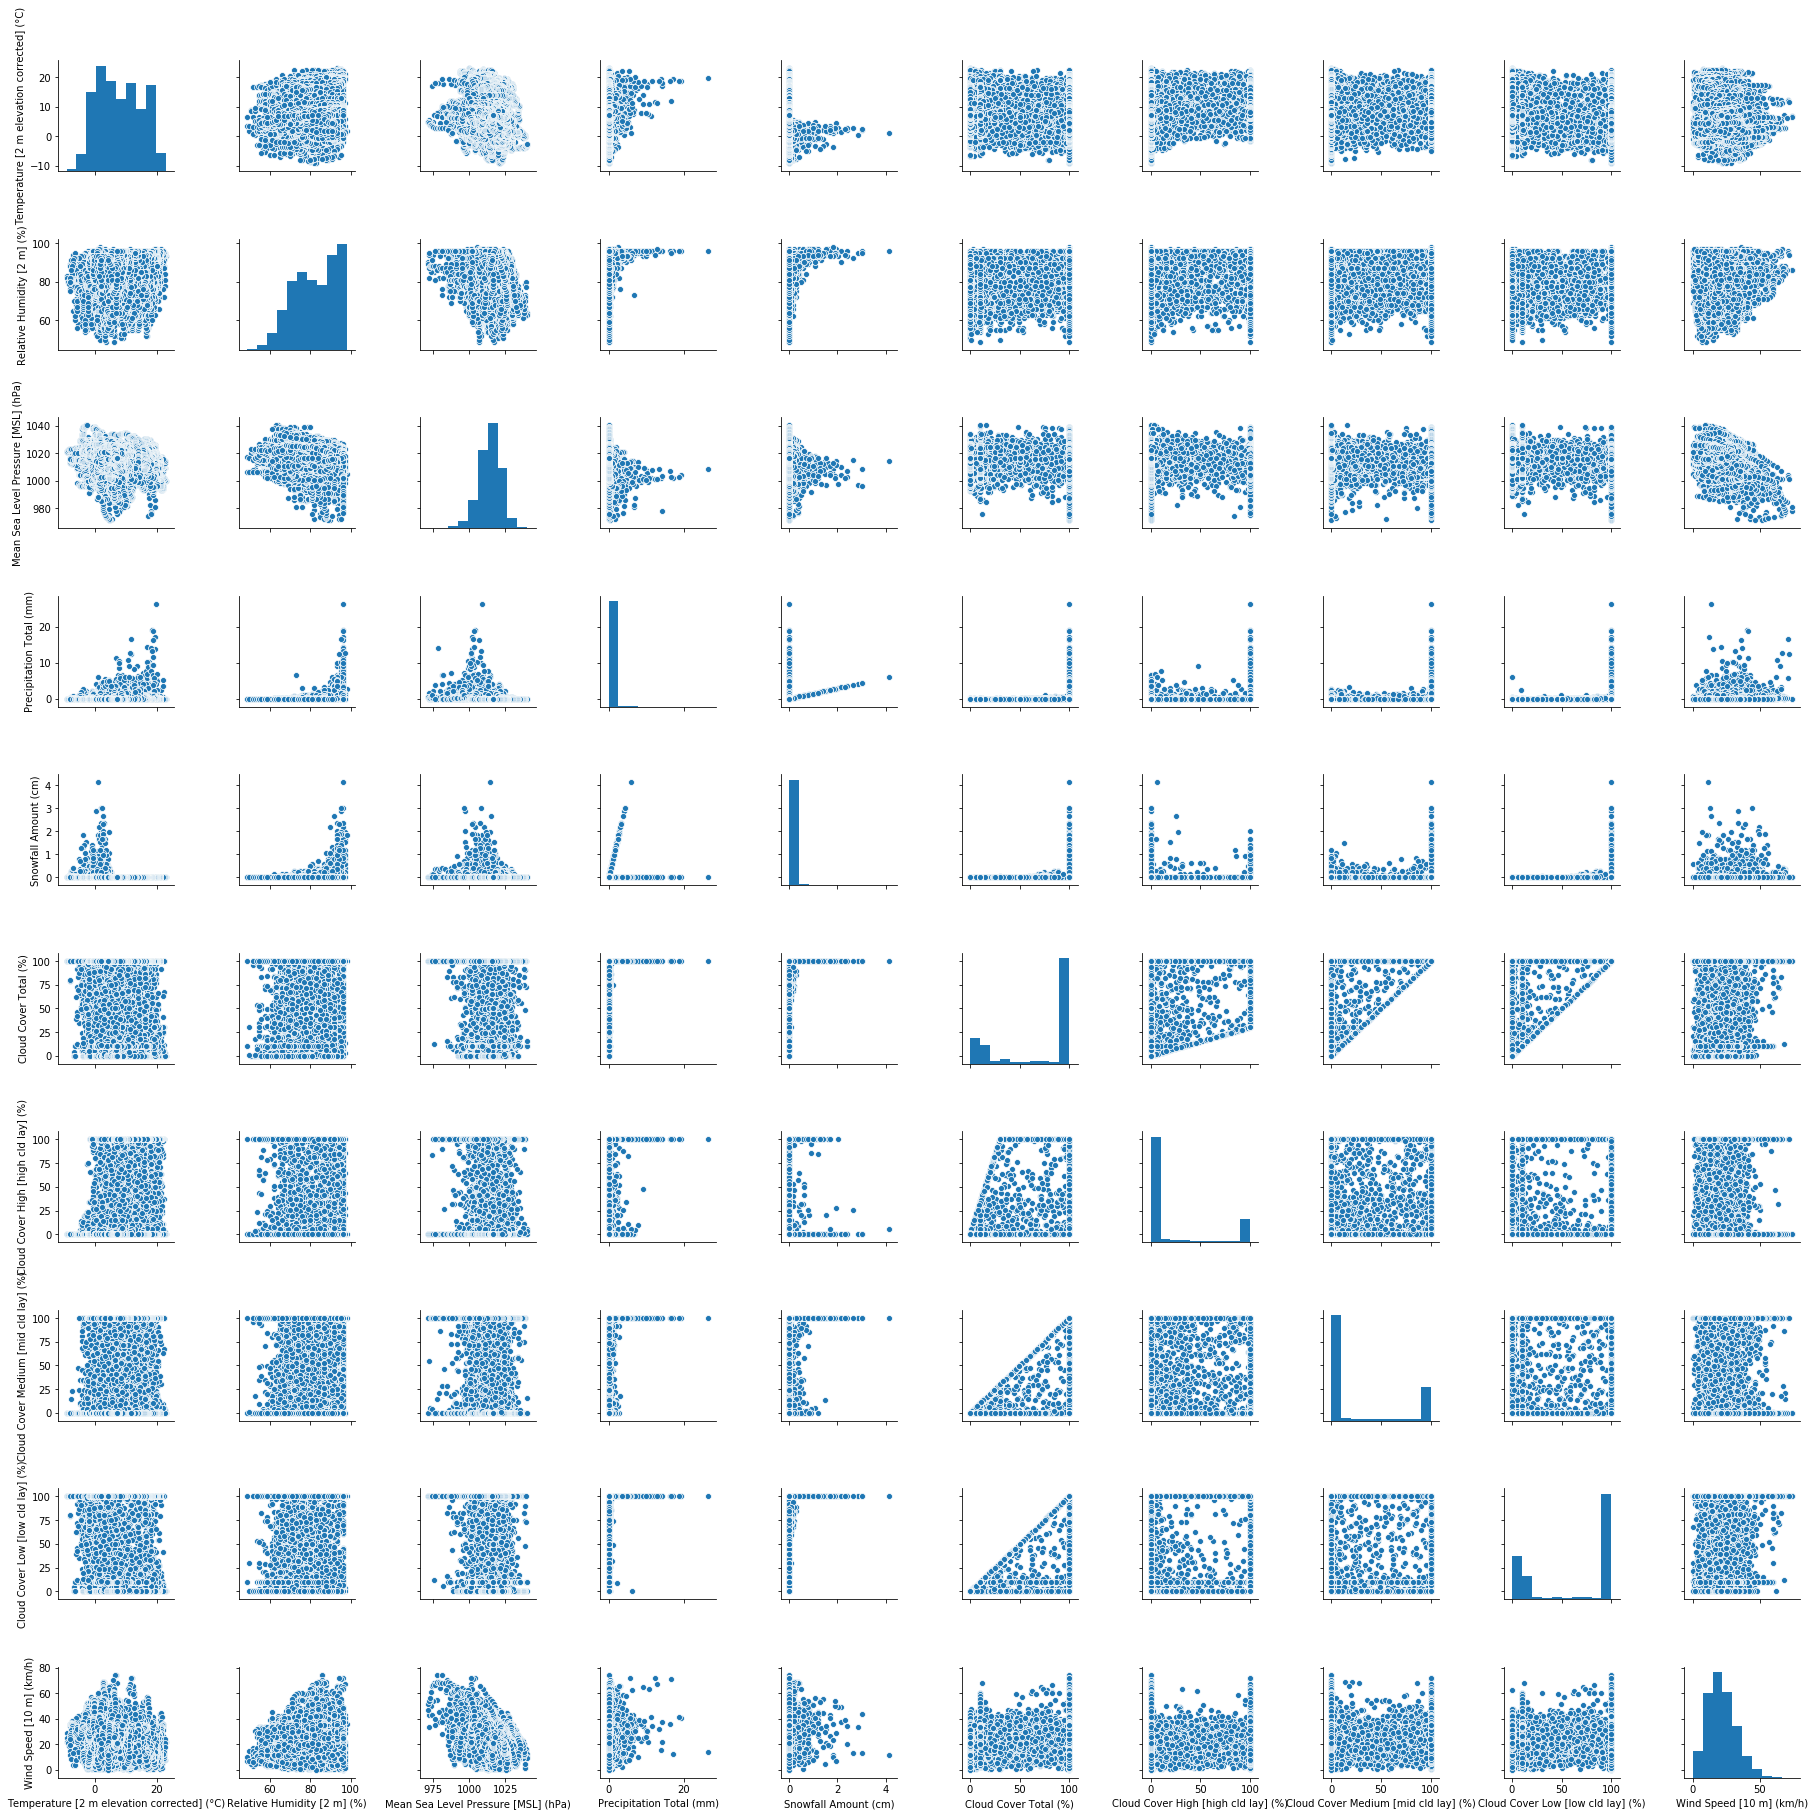

In [390]:
sns.pairplot(japan_weather[['Temperature [2 m elevation corrected] (°C)',
       'Relative Humidity [2 m] (%)',
       'Mean Sea Level Pressure [MSL] (hPa)', 'Precipitation Total (mm)',
       'Snowfall Amount (cm)', 'Cloud Cover Total (%)',
       'Cloud Cover High [high cld lay] (%)',
       'Cloud Cover Medium [mid cld lay] (%)',
       'Cloud Cover Low [low cld lay] (%)', 'Wind Speed [10 m] (km/h)']])

Распределение скоростей по каждому типу для Японии и Ньюфаундленда соответственно

In [542]:
japan_ships_avg_weather.groupby('type')['avg_speed'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Cargo ship,396.0,23.792858,7.369153,0.158167,20.234661,23.047481,26.808993,42.600813
Fishing vessel,22.0,16.969607,6.054861,3.978992,12.225645,16.916401,20.527064,28.604437
Ship,20.0,15.395678,9.631120,0.607288,6.480233,19.553534,21.753872,28.178559
Tanker,68.0,18.854503,9.557713,2.383093,15.312492,21.717462,25.058394,36.836756


In [545]:
newfoundland_ships_avg_weather.groupby('type')['avg_speed'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Cargo ship,16.0,17.453851,8.430809,2.178940,13.269637,18.431548,22.856357,34.270135
Fishing vessel,3.0,12.659794,2.191371,10.182288,11.817606,13.452924,13.898547,14.344170
Ship,3.0,2.287034,1.933604,0.674465,1.215211,1.755956,3.093319,4.430681
Tanker,63.0,13.965848,5.644242,1.074301,9.914637,13.343753,18.183038,25.673351


Распределение по типам для Ньюфаундленда

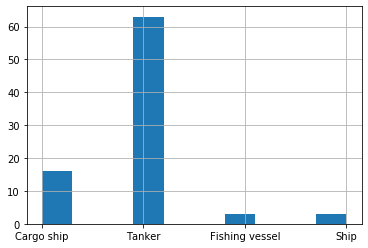

In [546]:
newfoundland_ships_avg_weather['type'].hist()

type
Cargo ship        AxesSubplot(0.125,0.125;0.775x0.755)
Fishing vessel    AxesSubplot(0.125,0.125;0.775x0.755)
Ship              AxesSubplot(0.125,0.125;0.775x0.755)
Tanker            AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_speed, dtype: object

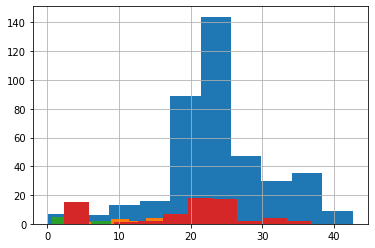

In [541]:
japan_ships_avg_weather.groupby('type')['avg_speed'].hist()

Распределение скорости грузовых кораблей для Ньюфаундленда и Японии

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


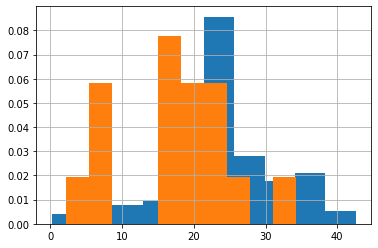

In [544]:
japan_ships_avg_weather[japan_ships_avg_weather.type == 'Cargo ship']['avg_speed'].hist(normed=True)
newfoundland_ships_avg_weather[newfoundland_ships_avg_weather.type == 'Cargo ship']['avg_speed'].hist(normed=True)

Мы можем видеть, что скорость грузовых для Японии как правило больше

In [700]:
from catboost import CatBoostRegressor

In [704]:
#ordinal model +0

X = pd.get_dummies(ships_avg_weather[['type', *japan_weather.columns.values[1:]]]) # one hot type

y = ships_avg_weather['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_catboost = CatBoostRegressor()

regr_catboost.fit(X_train, y_train)

print("MSE = ", np.mean((regr_catboost.predict(X_test) - y_test)**2))
print("MAE = ", np.mean(np.abs(regr_catboost.predict(X_test) - y_test)))

Learning rate set to 0.034537
0:	learn: 8.5706666	total: 2.09ms	remaining: 2.09s
1:	learn: 8.5055845	total: 3.92ms	remaining: 1.96s
2:	learn: 8.4479970	total: 5.64ms	remaining: 1.87s
3:	learn: 8.3946933	total: 7.31ms	remaining: 1.82s
4:	learn: 8.3372400	total: 9.43ms	remaining: 1.88s
5:	learn: 8.2822592	total: 11ms	remaining: 1.83s
6:	learn: 8.2206216	total: 12.7ms	remaining: 1.81s
7:	learn: 8.1741818	total: 14.9ms	remaining: 1.84s
8:	learn: 8.1269687	total: 17ms	remaining: 1.87s
9:	learn: 8.0767138	total: 18.7ms	remaining: 1.85s
10:	learn: 8.0259222	total: 20.9ms	remaining: 1.88s
11:	learn: 7.9887166	total: 22.6ms	remaining: 1.86s
12:	learn: 7.9399289	total: 24.3ms	remaining: 1.85s
13:	learn: 7.8998662	total: 26.3ms	remaining: 1.85s
14:	learn: 7.8585235	total: 28.3ms	remaining: 1.86s
15:	learn: 7.8169426	total: 30.5ms	remaining: 1.87s
16:	learn: 7.7854380	total: 32.3ms	remaining: 1.87s
17:	learn: 7.7387231	total: 33.9ms	remaining: 1.85s
18:	learn: 7.6942627	total: 35.7ms	remaining: 1.

175:	learn: 5.2999976	total: 320ms	remaining: 1.5s
176:	learn: 5.2946595	total: 322ms	remaining: 1.5s
177:	learn: 5.2835594	total: 324ms	remaining: 1.49s
178:	learn: 5.2731629	total: 325ms	remaining: 1.49s
179:	learn: 5.2689942	total: 330ms	remaining: 1.5s
180:	learn: 5.2623723	total: 331ms	remaining: 1.5s
181:	learn: 5.2564534	total: 334ms	remaining: 1.5s
182:	learn: 5.2483274	total: 335ms	remaining: 1.5s
183:	learn: 5.2385355	total: 337ms	remaining: 1.49s
184:	learn: 5.2284210	total: 339ms	remaining: 1.49s
185:	learn: 5.2195480	total: 341ms	remaining: 1.49s
186:	learn: 5.2075282	total: 343ms	remaining: 1.49s
187:	learn: 5.1980813	total: 345ms	remaining: 1.49s
188:	learn: 5.1895413	total: 347ms	remaining: 1.49s
189:	learn: 5.1836785	total: 349ms	remaining: 1.49s
190:	learn: 5.1741238	total: 351ms	remaining: 1.49s
191:	learn: 5.1648484	total: 353ms	remaining: 1.49s
192:	learn: 5.1588572	total: 355ms	remaining: 1.49s
193:	learn: 5.1496324	total: 357ms	remaining: 1.48s
194:	learn: 5.1342

348:	learn: 3.9652916	total: 640ms	remaining: 1.19s
349:	learn: 3.9539531	total: 642ms	remaining: 1.19s
350:	learn: 3.9503539	total: 644ms	remaining: 1.19s
351:	learn: 3.9461289	total: 646ms	remaining: 1.19s
352:	learn: 3.9393601	total: 649ms	remaining: 1.19s
353:	learn: 3.9302760	total: 651ms	remaining: 1.19s
354:	learn: 3.9290508	total: 653ms	remaining: 1.19s
355:	learn: 3.9226115	total: 655ms	remaining: 1.18s
356:	learn: 3.9155104	total: 657ms	remaining: 1.18s
357:	learn: 3.9109236	total: 658ms	remaining: 1.18s
358:	learn: 3.9025680	total: 660ms	remaining: 1.18s
359:	learn: 3.8980443	total: 662ms	remaining: 1.18s
360:	learn: 3.8901704	total: 664ms	remaining: 1.18s
361:	learn: 3.8814637	total: 665ms	remaining: 1.17s
362:	learn: 3.8749204	total: 667ms	remaining: 1.17s
363:	learn: 3.8696612	total: 668ms	remaining: 1.17s
364:	learn: 3.8610837	total: 670ms	remaining: 1.17s
365:	learn: 3.8527577	total: 671ms	remaining: 1.16s
366:	learn: 3.8519441	total: 673ms	remaining: 1.16s
367:	learn: 

526:	learn: 3.0411338	total: 961ms	remaining: 862ms
527:	learn: 3.0350664	total: 963ms	remaining: 861ms
528:	learn: 3.0284077	total: 965ms	remaining: 859ms
529:	learn: 3.0252735	total: 967ms	remaining: 857ms
530:	learn: 3.0247102	total: 969ms	remaining: 856ms
531:	learn: 3.0197076	total: 971ms	remaining: 854ms
532:	learn: 3.0133264	total: 973ms	remaining: 853ms
533:	learn: 3.0090784	total: 975ms	remaining: 851ms
534:	learn: 3.0039483	total: 977ms	remaining: 849ms
535:	learn: 3.0016717	total: 979ms	remaining: 848ms
536:	learn: 2.9978130	total: 981ms	remaining: 846ms
537:	learn: 2.9938591	total: 983ms	remaining: 844ms
538:	learn: 2.9903621	total: 984ms	remaining: 842ms
539:	learn: 2.9899229	total: 986ms	remaining: 840ms
540:	learn: 2.9879871	total: 987ms	remaining: 838ms
541:	learn: 2.9874702	total: 989ms	remaining: 836ms
542:	learn: 2.9856841	total: 991ms	remaining: 834ms
543:	learn: 2.9780966	total: 996ms	remaining: 835ms
544:	learn: 2.9761494	total: 999ms	remaining: 834ms
545:	learn: 

708:	learn: 2.4072506	total: 1.29s	remaining: 529ms
709:	learn: 2.4041098	total: 1.29s	remaining: 527ms
710:	learn: 2.3991804	total: 1.29s	remaining: 525ms
711:	learn: 2.3948548	total: 1.29s	remaining: 524ms
712:	learn: 2.3928263	total: 1.3s	remaining: 522ms
713:	learn: 2.3891466	total: 1.3s	remaining: 520ms
714:	learn: 2.3860287	total: 1.3s	remaining: 518ms
715:	learn: 2.3832670	total: 1.3s	remaining: 517ms
716:	learn: 2.3813640	total: 1.3s	remaining: 515ms
717:	learn: 2.3755613	total: 1.31s	remaining: 513ms
718:	learn: 2.3752294	total: 1.31s	remaining: 511ms
719:	learn: 2.3735106	total: 1.31s	remaining: 509ms
720:	learn: 2.3686455	total: 1.31s	remaining: 508ms
721:	learn: 2.3635721	total: 1.31s	remaining: 506ms
722:	learn: 2.3598329	total: 1.31s	remaining: 504ms
723:	learn: 2.3568166	total: 1.32s	remaining: 502ms
724:	learn: 2.3521615	total: 1.32s	remaining: 500ms
725:	learn: 2.3485169	total: 1.32s	remaining: 498ms
726:	learn: 2.3458573	total: 1.32s	remaining: 496ms
727:	learn: 2.340

902:	learn: 1.8947441	total: 1.61s	remaining: 173ms
903:	learn: 1.8934378	total: 1.62s	remaining: 172ms
904:	learn: 1.8907148	total: 1.62s	remaining: 170ms
905:	learn: 1.8878979	total: 1.62s	remaining: 168ms
906:	learn: 1.8857341	total: 1.62s	remaining: 166ms
907:	learn: 1.8810189	total: 1.62s	remaining: 165ms
908:	learn: 1.8800837	total: 1.63s	remaining: 163ms
909:	learn: 1.8782684	total: 1.63s	remaining: 161ms
910:	learn: 1.8764928	total: 1.63s	remaining: 159ms
911:	learn: 1.8759391	total: 1.63s	remaining: 158ms
912:	learn: 1.8732747	total: 1.63s	remaining: 156ms
913:	learn: 1.8711499	total: 1.64s	remaining: 154ms
914:	learn: 1.8690422	total: 1.64s	remaining: 152ms
915:	learn: 1.8661643	total: 1.64s	remaining: 150ms
916:	learn: 1.8643623	total: 1.64s	remaining: 149ms
917:	learn: 1.8639630	total: 1.64s	remaining: 147ms
918:	learn: 1.8621944	total: 1.64s	remaining: 145ms
919:	learn: 1.8601702	total: 1.65s	remaining: 143ms
920:	learn: 1.8576286	total: 1.65s	remaining: 141ms
921:	learn: 

In [705]:
#ordinal model +0

X = pd.get_dummies(ships_avg_weather[['entryDraft', *japan_weather.columns.values[1:]]]) # one hot type

y = ships_avg_weather['avg_speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

regr_catboost = CatBoostRegressor()

regr_catboost.fit(X_train, y_train)

print("MSE = ", np.mean((regr_catboost.predict(X_test) - y_test)**2))
print("MAE = ", np.mean(np.abs(regr_catboost.predict(X_test) - y_test)))

Learning rate set to 0.034537
0:	learn: 8.2867700	total: 3.2ms	remaining: 3.2s
1:	learn: 8.2420508	total: 5.54ms	remaining: 2.76s
2:	learn: 8.2073452	total: 7.98ms	remaining: 2.65s
3:	learn: 8.1706019	total: 10.4ms	remaining: 2.59s
4:	learn: 8.1389342	total: 12.9ms	remaining: 2.56s
5:	learn: 8.1083601	total: 15.3ms	remaining: 2.54s
6:	learn: 8.0730482	total: 17.9ms	remaining: 2.54s
7:	learn: 8.0331498	total: 20ms	remaining: 2.48s
8:	learn: 7.9967211	total: 22.6ms	remaining: 2.49s
9:	learn: 7.9582145	total: 25.1ms	remaining: 2.48s
10:	learn: 7.9257530	total: 27.4ms	remaining: 2.46s
11:	learn: 7.8959551	total: 29.7ms	remaining: 2.44s
12:	learn: 7.8644711	total: 32.2ms	remaining: 2.45s
13:	learn: 7.8250783	total: 34.3ms	remaining: 2.41s
14:	learn: 7.7907322	total: 36.8ms	remaining: 2.42s
15:	learn: 7.7621281	total: 39.6ms	remaining: 2.44s
16:	learn: 7.7345869	total: 41.8ms	remaining: 2.42s
17:	learn: 7.7041850	total: 44.1ms	remaining: 2.4s
18:	learn: 7.6797707	total: 46.4ms	remaining: 2.3

218:	learn: 5.3199954	total: 490ms	remaining: 1.75s
219:	learn: 5.3158989	total: 492ms	remaining: 1.74s
220:	learn: 5.2978929	total: 494ms	remaining: 1.74s
221:	learn: 5.2923975	total: 496ms	remaining: 1.74s
222:	learn: 5.2882691	total: 498ms	remaining: 1.74s
223:	learn: 5.2837564	total: 501ms	remaining: 1.73s
224:	learn: 5.2783298	total: 503ms	remaining: 1.73s
225:	learn: 5.2685358	total: 505ms	remaining: 1.73s
226:	learn: 5.2588323	total: 508ms	remaining: 1.73s
227:	learn: 5.2480917	total: 510ms	remaining: 1.73s
228:	learn: 5.2398512	total: 512ms	remaining: 1.72s
229:	learn: 5.2187269	total: 514ms	remaining: 1.72s
230:	learn: 5.2068391	total: 517ms	remaining: 1.72s
231:	learn: 5.2023377	total: 520ms	remaining: 1.72s
232:	learn: 5.1971449	total: 522ms	remaining: 1.72s
233:	learn: 5.1930869	total: 523ms	remaining: 1.71s
234:	learn: 5.1887583	total: 525ms	remaining: 1.71s
235:	learn: 5.1756267	total: 527ms	remaining: 1.71s
236:	learn: 5.1703258	total: 529ms	remaining: 1.7s
237:	learn: 5

439:	learn: 4.2408566	total: 987ms	remaining: 1.25s
440:	learn: 4.2345184	total: 989ms	remaining: 1.25s
441:	learn: 4.2256351	total: 991ms	remaining: 1.25s
442:	learn: 4.2246039	total: 994ms	remaining: 1.25s
443:	learn: 4.2231231	total: 996ms	remaining: 1.25s
444:	learn: 4.2181155	total: 998ms	remaining: 1.24s
445:	learn: 4.2162276	total: 1s	remaining: 1.24s
446:	learn: 4.2139255	total: 1s	remaining: 1.24s
447:	learn: 4.2091110	total: 1s	remaining: 1.24s
448:	learn: 4.2029481	total: 1.01s	remaining: 1.24s
449:	learn: 4.2017281	total: 1.01s	remaining: 1.23s
450:	learn: 4.1994635	total: 1.01s	remaining: 1.23s
451:	learn: 4.1963996	total: 1.01s	remaining: 1.23s
452:	learn: 4.1903980	total: 1.02s	remaining: 1.23s
453:	learn: 4.1888366	total: 1.02s	remaining: 1.23s
454:	learn: 4.1866120	total: 1.02s	remaining: 1.22s
455:	learn: 4.1855939	total: 1.02s	remaining: 1.22s
456:	learn: 4.1829559	total: 1.02s	remaining: 1.22s
457:	learn: 4.1733651	total: 1.03s	remaining: 1.22s
458:	learn: 4.1698802

672:	learn: 3.4348730	total: 1.48s	remaining: 720ms
673:	learn: 3.4316751	total: 1.48s	remaining: 717ms
674:	learn: 3.4235519	total: 1.49s	remaining: 715ms
675:	learn: 3.4214810	total: 1.49s	remaining: 713ms
676:	learn: 3.4205249	total: 1.49s	remaining: 711ms
677:	learn: 3.4191491	total: 1.49s	remaining: 709ms
678:	learn: 3.4184327	total: 1.49s	remaining: 707ms
679:	learn: 3.4104568	total: 1.5s	remaining: 704ms
680:	learn: 3.4014088	total: 1.5s	remaining: 702ms
681:	learn: 3.4005033	total: 1.5s	remaining: 700ms
682:	learn: 3.3936517	total: 1.5s	remaining: 698ms
683:	learn: 3.3899860	total: 1.51s	remaining: 696ms
684:	learn: 3.3894230	total: 1.51s	remaining: 693ms
685:	learn: 3.3853135	total: 1.51s	remaining: 691ms
686:	learn: 3.3843762	total: 1.51s	remaining: 689ms
687:	learn: 3.3821017	total: 1.51s	remaining: 686ms
688:	learn: 3.3790872	total: 1.51s	remaining: 684ms
689:	learn: 3.3750332	total: 1.52s	remaining: 682ms
690:	learn: 3.3744406	total: 1.52s	remaining: 680ms
691:	learn: 3.37

900:	learn: 2.8296948	total: 1.98s	remaining: 218ms
901:	learn: 2.8291808	total: 1.98s	remaining: 215ms
902:	learn: 2.8287648	total: 1.98s	remaining: 213ms
903:	learn: 2.8282221	total: 1.99s	remaining: 211ms
904:	learn: 2.8278698	total: 1.99s	remaining: 209ms
905:	learn: 2.8261768	total: 1.99s	remaining: 207ms
906:	learn: 2.8253472	total: 1.99s	remaining: 204ms
907:	learn: 2.8239027	total: 1.99s	remaining: 202ms
908:	learn: 2.8217111	total: 2s	remaining: 200ms
909:	learn: 2.8204571	total: 2s	remaining: 198ms
910:	learn: 2.8189933	total: 2s	remaining: 196ms
911:	learn: 2.8172651	total: 2s	remaining: 193ms
912:	learn: 2.8156185	total: 2.01s	remaining: 191ms
913:	learn: 2.8151620	total: 2.01s	remaining: 189ms
914:	learn: 2.8140988	total: 2.01s	remaining: 187ms
915:	learn: 2.8136555	total: 2.01s	remaining: 185ms
916:	learn: 2.8081261	total: 2.02s	remaining: 183ms
917:	learn: 2.8077232	total: 2.02s	remaining: 180ms
918:	learn: 2.8035188	total: 2.02s	remaining: 178ms
919:	learn: 2.8006343	to

**Корреляции между погодными признаками**

In [76]:
ships_avg_weather = pd.read_csv("ShipsWeather.csv")

In [77]:
weather_features = ['Temperature [2 m elevation corrected] (°C)',
 'Relative Humidity [2 m] (%)',
 'Mean Sea Level Pressure [MSL] (hPa)',
 'Precipitation Total (mm)',
 'Snowfall Amount (cm)',
 'Cloud Cover Total (%)',
 'Cloud Cover High [high cld lay] (%)',
 'Cloud Cover Medium [mid cld lay] (%)',
 'Cloud Cover Low [low cld lay] (%)',
 'Wind Speed [10 m] (km/h)',
 'Wind Speed [80 m] (km/h)',
 'Wind Speed [900 mb] (km/h)',
 'Wind Speed [850 mb] (km/h)',
 'Geopotential Height [1000 mb] (Gpm)',
 'Geopotential Height [850 mb] (Gpm)',
 'Temperature [1000 mb] (°C)',
 'Temperature [850 mb] (°C)']

In [78]:
direct_columns = ['Wind Direction [10 m] (°)',
 'Wind Direction [850 mb] (°)',
 'Wind Direction [900 mb] (°)',
 'Wind Direction [80 m] (°)']

In [79]:
features = ['type', *weather_features,
                                            *["tan " + col for col in direct_columns]]

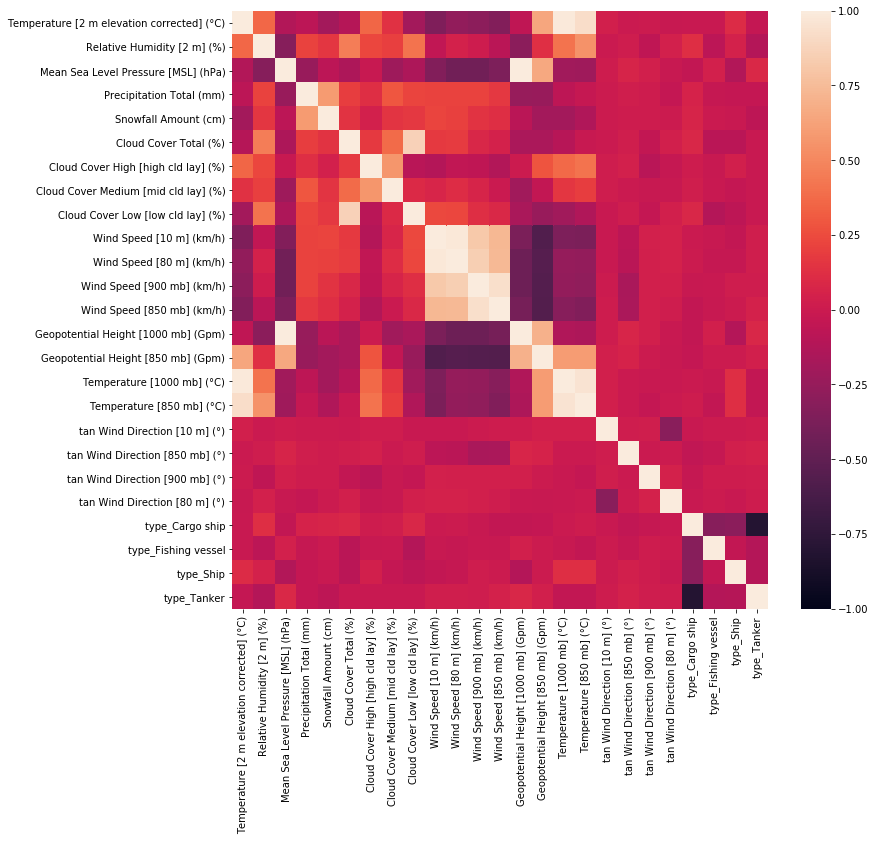

In [90]:
# Heatmap

plt.figure(figsize=(12, 11))

sns.heatmap(X.corr(), vmin=-1, vmax=1)

Признаки при удалении некоторых коррелированных фичей

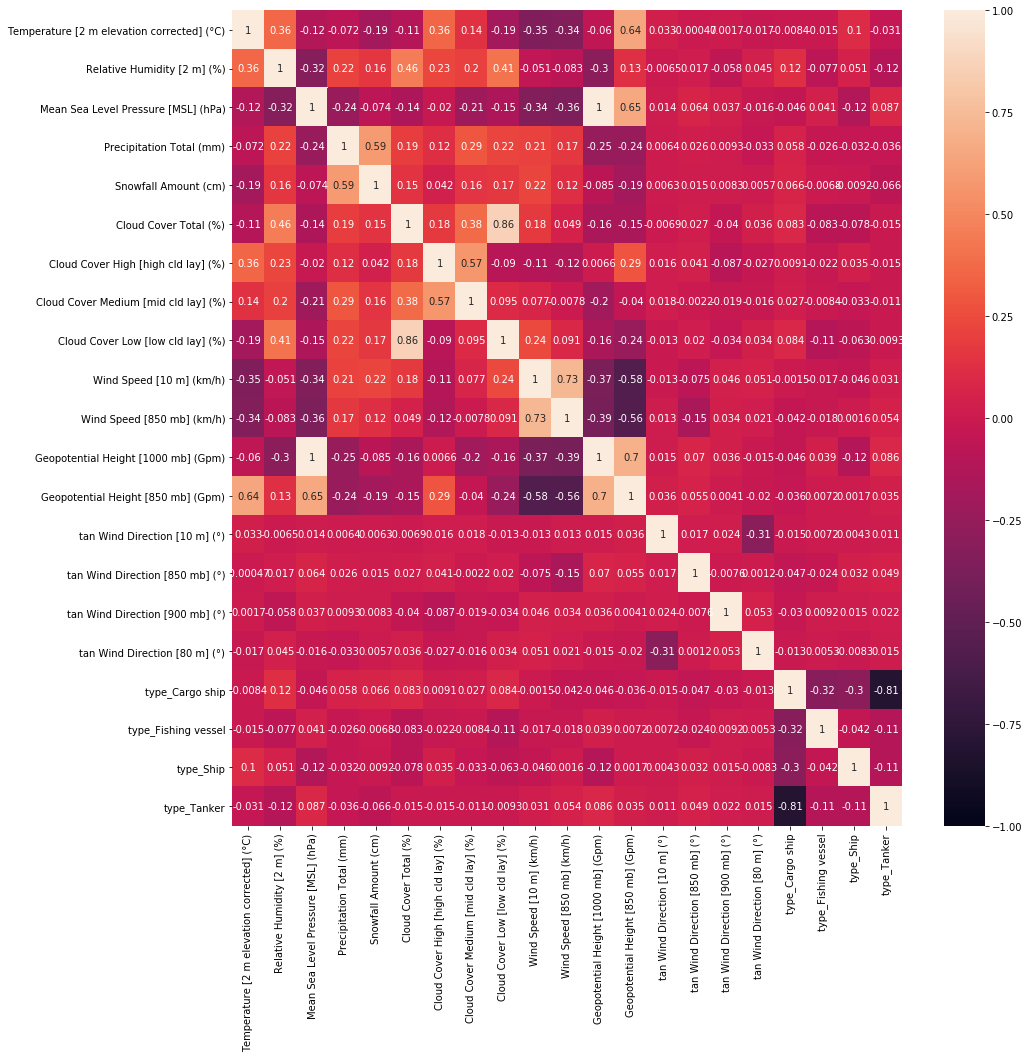

In [27]:
drop_columns = ['Wind Speed [80 m] (km/h)',
                'Wind Speed [900 mb] (km/h)',
               'Temperature [1000 mb] (°C)',
                 'Temperature [850 mb] (°C)']

plt.figure(figsize=(15, 15))

sns.heatmap(X.drop(columns=drop_columns).corr(), vmin=-1, vmax=1, annot=True)

Попарные графики температурных признаков

<Figure size 1080x1080 with 0 Axes>

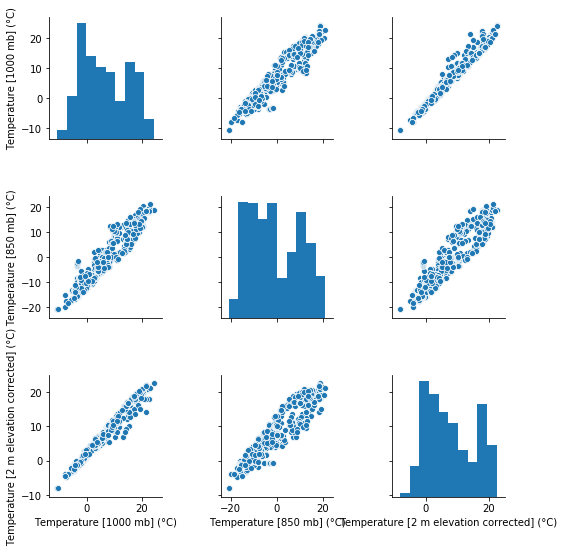

In [30]:
plt.figure(figsize=(15, 15))

sns.pairplot(X.loc[:, ['Temperature [1000 mb] (°C)',
             'Temperature [850 mb] (°C)',
             'Temperature [2 m elevation corrected] (°C)']])

Графики признаков скорости ветра

<Figure size 1080x1080 with 0 Axes>

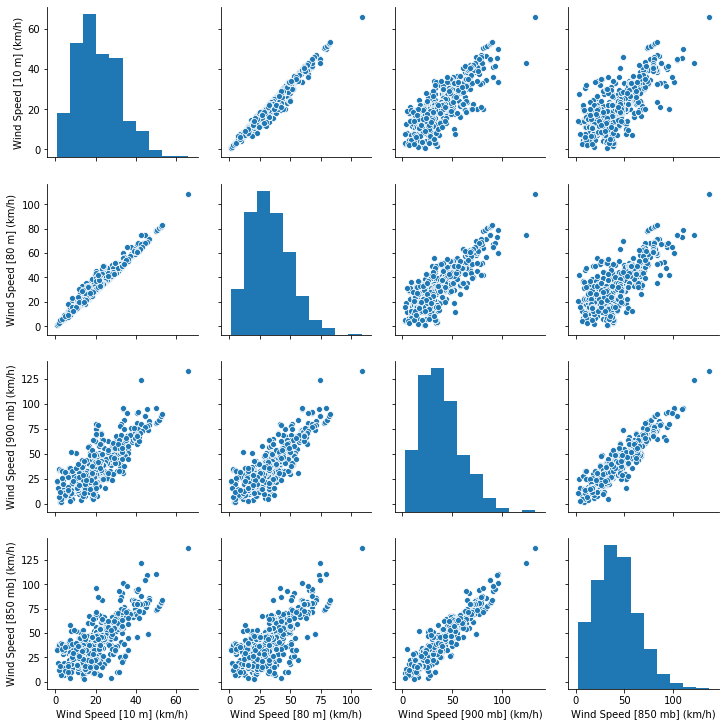

In [31]:
plt.figure(figsize=(15, 15))

sns.pairplot(X.loc[:, ['Wind Speed [10 m] (km/h)',
 'Wind Speed [80 m] (km/h)',
 'Wind Speed [900 mb] (km/h)',
 'Wind Speed [850 mb] (km/h)',]])

Для геопотенциальной высоты

<Figure size 1080x1080 with 0 Axes>

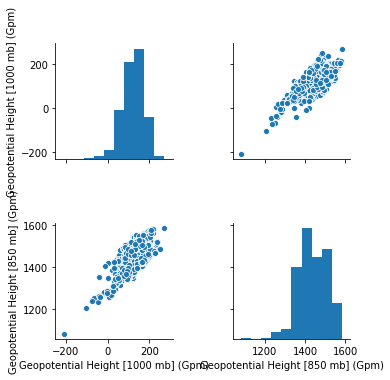

In [10]:
plt.figure(figsize=(15, 15))

sns.pairplot(X.loc[:, ['Geopotential Height [1000 mb] (Gpm)',
                     'Geopotential Height [850 mb] (Gpm)']])